## Mediapipe 를 이용한 손움직임 찾기

In [ ]:
## https://google.github.io/mediapipe/solutions/hands

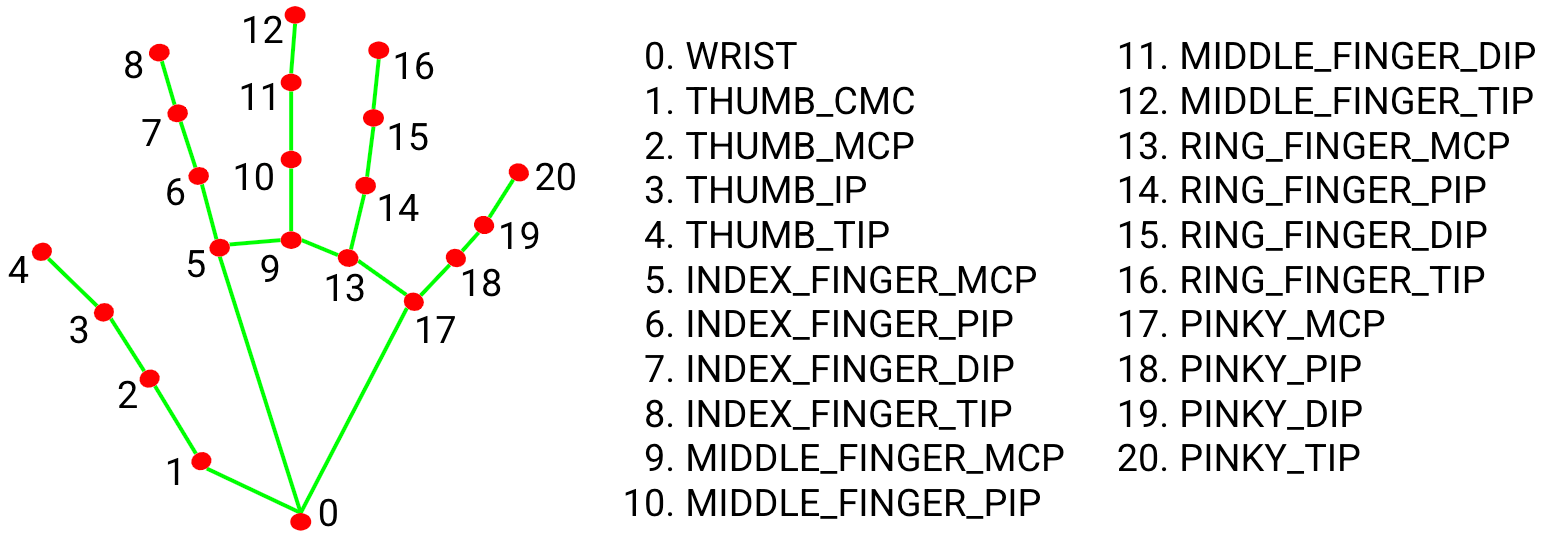

In [1]:
from IPython.display import Image
Image('https://google.github.io/mediapipe/images/mobile/hand_landmarks.png')

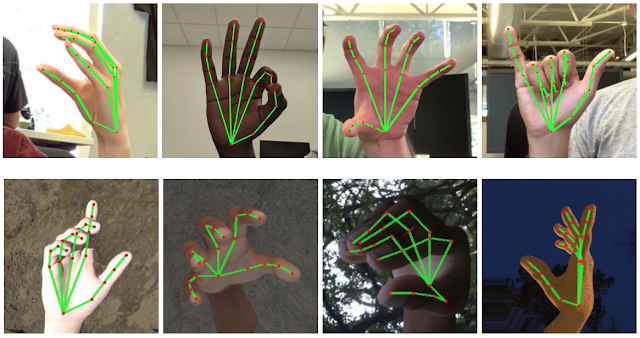

In [2]:
from IPython.display import Image
Image('https://google.github.io/mediapipe/images/mobile/hand_crops.png')

In [1]:
! pip install mediapipe

In [2]:
import cv2
import mediapipe as mp

In [3]:
# sub-modules of the modules we imported
mp_drawing = mp.solutions.drawing_utils # MediaPipe solution drawing utils.
mp_drawing_styles = mp.solutions.drawing_styles # MediaPipe solution drawing styles.
mp_hands = mp.solutions.hands


In [6]:
# For webcam input:
cap = cv2.VideoCapture(0)

# MediaPipe Hands processes an RGB image and returns the hand landmarks
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
#     Landmark accuracy as well as inference latency generally go up with the model complexity
    model_complexity=0, 
#     the hand detection confidence
    min_detection_confidence=0.5,
#   robustness of the solution, at the expense of a higher latency
    min_tracking_confidence=0.5) as hands:
    
  while cap.isOpened():
    ret, image = cap.read()
    if not ret:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
#     image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    ## 
    results = hands.process(image)
    
    # Draw the hand annotations on the image.
#     image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
        
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(20) == 27:
      break

cap.release()
cv2.destroyAllWindows()

In [ ]:
def drawROI()